In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

In [2]:
sys.path.append("../modules/")

In [3]:
import ContentRecommender
import CollaborativeRecommender

In [4]:
import UserStreamViews
import CombinedRecommender

In [5]:
user_views_per_stream_df = pd.read_csv("data/user_views_per_stream.csv", header=0)
user_views_per_stream_df.head()

,USERID,STREAMID,num_views,day_of_week,time_labeled,num_cards,views_per_card
0,245,163,1029,Wednesday,Afternoon,15,68.600000
1,245,167,258,Thursday,Afternoon,14,18.428571
2,245,171,123,Wednesday,Afternoon,6,20.500000
3,245,172,83,Wednesday,Afternoon,4,20.750000
4,245,173,167,Monday,Afternoon,8,20.875000


In [6]:
unique_users = np.unique(user_views_per_stream_df["USERID"].values)
unique_users.shape

(219,)

In [7]:
stream_views_raw_df = pd.read_csv("data/content_views_raw.csv", header=0)
stream_views_raw_df.head()

,USERID,CARDID,CARDTITLE,STREAMID,STREAMNAME,TIMESTAMP,MODULEID,MODULENAME
0,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
1,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
2,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
3,1007,2808,ENGINE OIL ADDITIVES,561,What is engine oil made of?,31-05-2017 01:15,430,2. WHAT IS ENGINE OIL MADE OF?
4,1007,2808,ENGINE OIL ADDITIVES,561,What is engine oil made of?,31-05-2017 01:15,430,2. WHAT IS ENGINE OIL MADE OF?


In [8]:
stream_views_raw_df['TIMESTAMP'] = pd.to_datetime(stream_views_raw_df['TIMESTAMP'], format="%d-%m-%Y %H:%M")


In [9]:
NUM_USERS = 10
selected_users = np.random.choice(unique_users, NUM_USERS, False)


## Content recommendations for each of the users

In [10]:
content_recommended_streams = []
all_user_viewed_streams = []

for userid in selected_users:
    recent_viewed_streams = UserStreamViews.get_latest_streams_for_user(stream_views_raw_df, userid)
    recent_viewed_stream_ids = [x[0] for x in recent_viewed_streams]
    similar_streams_based_on_history = ContentRecommender.get_similar_streams_based_on_history(recent_viewed_stream_ids)
    if similar_streams_based_on_history is not None:
        recommended_stream_ids = [s[0] for s in similar_streams_based_on_history]
        content_recommended_streams.extend(recommended_stream_ids)
    
    current_user_viewed_streams = user_views_per_stream_df[user_views_per_stream_df["USERID"] == userid]["STREAMID"].values
    all_user_viewed_streams.extend(current_user_viewed_streams)
    
content_recommended_streams = set(content_recommended_streams)
all_user_viewed_streams = set(all_user_viewed_streams)

print("Recommendations")
print(content_recommended_streams)
print(all_user_viewed_streams)

recommended_content_viewed = content_recommended_streams.intersection(all_user_viewed_streams)
len(recommended_content_viewed) / len(content_recommended_streams)

Recommendations
{2433, 2436, 1670, 523, 2444, 524, 2062, 1658, 548, 2102, 2104, 2373, 199, 2377, 202, 2380, 205, 2382, 2511, 2265, 2010, 2267, 2401, 2405, 230, 2407, 1128, 2281, 2408, 1644, 364, 2030, 2032, 624, 2034, 2036, 2038, 1655, 634, 1660}
{524, 414, 1058, 548, 237, 556, 557, 558, 238, 688, 1201, 560, 561, 562, 565, 820, 439, 440, 570, 623, 1089, 1090, 1347, 1092, 1093, 1094, 1095, 1096, 1097, 201, 203, 199, 624, 206, 218, 603, 247, 578, 1498, 1499, 1633, 610, 611, 612, 228, 230, 492, 493, 494, 495, 496, 497, 498, 499, 500, 629, 622, 634, 248, 505, 506, 636, 637}


0.15

In [11]:
def get_content_recommendation_performance(users, num_recommendations = 10):
    content_recommended_streams = []
    all_user_viewed_streams = []

    for userid in users:
        recent_viewed_streams = UserStreamViews.get_latest_streams_for_user(stream_views_raw_df, userid)
        recent_viewed_stream_ids = [x[0] for x in recent_viewed_streams]
        similar_streams_based_on_history = ContentRecommender.get_similar_streams_based_on_history(recent_viewed_stream_ids, max_similar_streams = num_recommendations)
        if similar_streams_based_on_history is not None:
            recommended_stream_ids = [s[0] for s in similar_streams_based_on_history]
            content_recommended_streams.extend(recommended_stream_ids)

        current_user_viewed_streams = user_views_per_stream_df[user_views_per_stream_df["USERID"] == userid]["STREAMID"].values
        all_user_viewed_streams.extend(current_user_viewed_streams)
    
    content_recommended_streams = set(content_recommended_streams)
    all_user_viewed_streams = set(all_user_viewed_streams)

    recommended_content_viewed = content_recommended_streams.intersection(all_user_viewed_streams)
    recommended_content_viewed_ratio = len(recommended_content_viewed) / len(content_recommended_streams)
    return recommended_content_viewed_ratio

In [18]:
content_reco_perfs = []
for itr in [10, 15, 20, 25, 30]:
    content_reco_perf = 0
    for jtr in range(20):
        selected_users = np.random.choice(unique_users, 40, False)
        content_reco_perf += get_content_recommendation_performance(selected_users, itr)
        
    content_reco_perfs.append((itr, content_reco_perf/20))

In [19]:
content_reco_perfs

[(10, 0.3439129713036842),
 (15, 0.35377040542426497),
 (20, 0.3782848120624519),
 (25, 0.358385361904472),
 (30, 0.37340794735803085)]

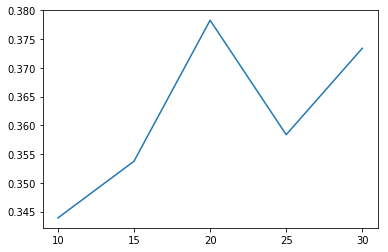

In [20]:
x = [content_reco_perf[0] for content_reco_perf in content_reco_perfs]
y = [content_reco_perf[1] for content_reco_perf in content_reco_perfs]

plt.xticks(x)
plt.plot(x, y)